In [187]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

import requests
import json
import getpass

In [188]:
polygon = gpd.read_file("../../../Projeto_Maracana/data/Ameba_Area/Ameba_Area.geojson")

In [193]:
# Get the bounding box of the polygon
minx, miny, maxx, maxy = polygon.geometry.total_bounds

# Generate a grid of points covering the bounding box
x, y = np.meshgrid(np.arange(minx, maxx, 0.0013), np.arange(miny, maxy, 0.0013))
grid_points = gpd.GeoDataFrame({'geometry': [Point(x, y) for x, y in zip(x.flatten(), y.flatten())]})

# Determine which points are inside the polygon
inside = grid_points.within(polygon.iloc[0].geometry)

# Extract the latitude and longitude of the points that are inside the polygon
lat_lon = grid_points[inside].apply(lambda x: x.geometry.coords[0], axis=1).values

<AxesSubplot: >

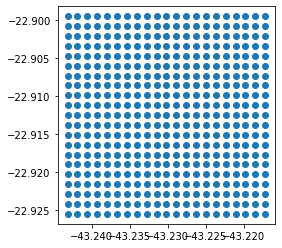

In [194]:
grid_points.plot()

In [195]:
# Convert the lat_lon list of tuples into a GeoDataFrame
points = gpd.GeoDataFrame(geometry=[Point(lat, lon) for lat, lon in lat_lon])

# Set the coordinate reference system (CRS) of the GeoDataFrame to WGS 84 (EPSG 4326)
points.crs = {'init': 'epsg:4326'}


C:\Users\gabri\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: >

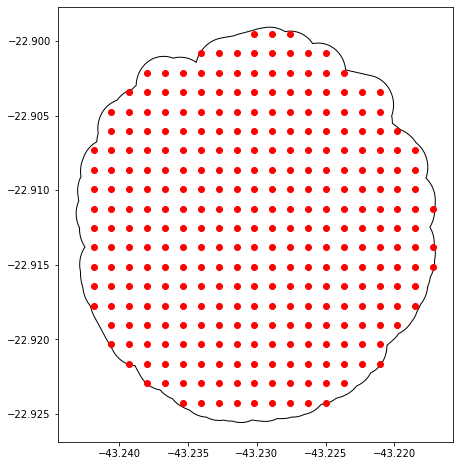

In [196]:
ax = polygon.plot(color='white', edgecolor='black', figsize=(15,8))
points.plot(ax=ax, color="red", figsize=(15,8))

In [197]:
lat_lon

array([(-43.2353754861, -22.9242330181), (-43.2340754861, -22.9242330181),
       (-43.232775486099996, -22.9242330181),
       (-43.231475486099995, -22.9242330181),
       (-43.230175486099995, -22.9242330181),
       (-43.228875486099994, -22.9242330181),
       (-43.227575486099994, -22.9242330181),
       (-43.22627548609999, -22.9242330181),
       (-43.22497548609999, -22.9242330181),
       (-43.2379754861, -22.9229330181), (-43.2366754861, -22.9229330181),
       (-43.2353754861, -22.9229330181), (-43.2340754861, -22.9229330181),
       (-43.232775486099996, -22.9229330181),
       (-43.231475486099995, -22.9229330181),
       (-43.230175486099995, -22.9229330181),
       (-43.228875486099994, -22.9229330181),
       (-43.227575486099994, -22.9229330181),
       (-43.22627548609999, -22.9229330181),
       (-43.22497548609999, -22.9229330181),
       (-43.22367548609999, -22.9229330181),
       (-43.2392754861, -22.9216330181), (-43.2379754861, -22.9216330181),
       (-43.236

# API

In [198]:
root = "https://api.claro-br.kidodynamics.com/v1/"
#project_root = root + 'project/{8976a73d-9e4d-487c-9556-02943fac6684}'

## LOGIN

In [200]:
user = input('Enter username:')
password = getpass.getpass('Pass')

Enter username:gabrieljunqueirasouza@hotmail.com
Pass········


In [207]:
login_response = requests.post(
    root + 'users/login',
    headers={
        'accept': 'application/json',
        'Content-Type': 'application/x-www-form-urlencoded',
    },
    data=f'grant_type=&username={user}&password={password}'
)
token = login_response.json()['access_token']

In [208]:
def headers(token):
    return {
        'accept': 'application/json',
        'Authorization': f"Bearer {token}"
    }

In [209]:
lon_lat = lat_lon
teste = lon_lat[0:30]

In [205]:
# # List to store the cell IDs
# cell_ids = []

# # Set to store the collected cell IDs
# collected_cell_ids = set()

# # Loop through each latitude-longitude pair in lat_lon
# for lon, lat in lon_lat:
#     # Format the API URL with the latitude and longitude
#     url = f"https://api.claro-br.kidodynamics.com/v1/grid/cell_from_point?lat={lat}&lon={lon}"
#     print(url)
    
#     # Send a GET request to the API
#     response = requests.get(url)
    
#     # Check if the request was successful
#     if response.status_code == 200:
#         # Extract the cell ID from the response JSON
#         cell_id = response.json().get('cell_id')
        
#         # Check if the cell ID has already been collected
#         if cell_id not in collected_cell_ids:
#             # Append the cell ID to the cell_ids list
#             cell_ids.append(cell_id)
            
#             # Add the cell ID to the collected_cell_ids set
#             collected_cell_ids.add(cell_id)
#     else:
#         # If the request was unsuccessful, print an error message
#         print(f"Request failed with status code {response.status_code}")

# # Print the cell IDs
# print(cell_ids)

In [206]:
# # List to store the cell IDs
# cell_ids = []

# # Set to store the collected cell IDs
# collected_cell_ids = set()


# DF = pd.DataFrame()
# df = pd.DataFrame()

# # Loop through each latitude-longitude pair in lat_lon
# for lon, lat in teste:
#     # Format the API URL with the latitude and longitude
#     url = f"https://api.claro-br.kidodynamics.com/v1/grid/cell_from_point?lat={lat}&lon={lon}"
      
#     # Send a GET request to the API
#     response = requests.get(url)
    
#     data = json.loads(response.text)
#     cell_id = data["data"][0]["value"]

#     print(cell_id)


In [210]:
# List to store the cell IDs
cell_ids = []

# Set to store the collected cell IDs
collected_cell_ids = set()


DF = pd.DataFrame()
df = pd.DataFrame()

# Loop through each latitude-longitude pair in lat_lon
for lon, lat in lon_lat:
    # Format the API URL with the latitude and longitude
    url = f"https://api.claro-br.kidodynamics.com/v1/grid/cell_from_point?lat={lat}&lon={lon}"
    
    # Check if the request was successful
    if response.status_code == 200:
        # Extract the cell ID from the response JSON
        response = requests.get(url)
    
        data = json.loads(response.text)
        cell_id = data["data"][0]["value"]
        
        # Check if the cell ID has already been collected
        if cell_id not in collected_cell_ids:
            # Append the cell ID to the cell_ids list
            cell_ids.append(cell_id)
            
            # Add the cell ID to the collected_cell_ids set
            collected_cell_ids.add(cell_id)
            
    else:
        #If the request was unsuccessful, print an error message
        print(f"Request failed with status code {response.status_code}")   
    
print(cell_id)


197525


In [213]:
len(collected_cell_ids)

30

In [215]:
len(points)

314

In [225]:
collected_cell_ids

{7729,
 17041,
 19624,
 28779,
 34099,
 60742,
 79576,
 87227,
 93660,
 99296,
 111305,
 123376,
 132715,
 141903,
 143563,
 167159,
 175023,
 176351,
 180320,
 186928,
 192236,
 194891,
 197525,
 202856,
 211087,
 221347,
 248194,
 250559,
 253130,
 261042}